## Exploratory Data Analysis for Bati bank

In [1]:
import pandas as pd
import sys

In [2]:
import sys
print(sys.executable)


c:\ProgramData\anaconda3\python.exe


## Overview of the data

In [3]:
# Load the data
df = pd.read_csv('C:/Users/King Betse/Downloads/data.csv')

# Shape of the dataset
print(df.shape)

# Data types of each column
print(df.dtypes)


(95662, 16)
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [4]:
# Get the number of rows
num_rows = df.shape[0]

print(f"The dataset contains {num_rows} rows.")

The dataset contains 95662 rows.


## Summary statistics

In [5]:
print(df.head)

<bound method NDFrame.head of               TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
0       SubscriptionId_887  CustomerId_4406          UGX          256   
1      SubscriptionId_3829  CustomerId_4406          UGX          2

In [6]:
# Summary statistics
print(df.describe())


       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## Distribution of Numerical Features

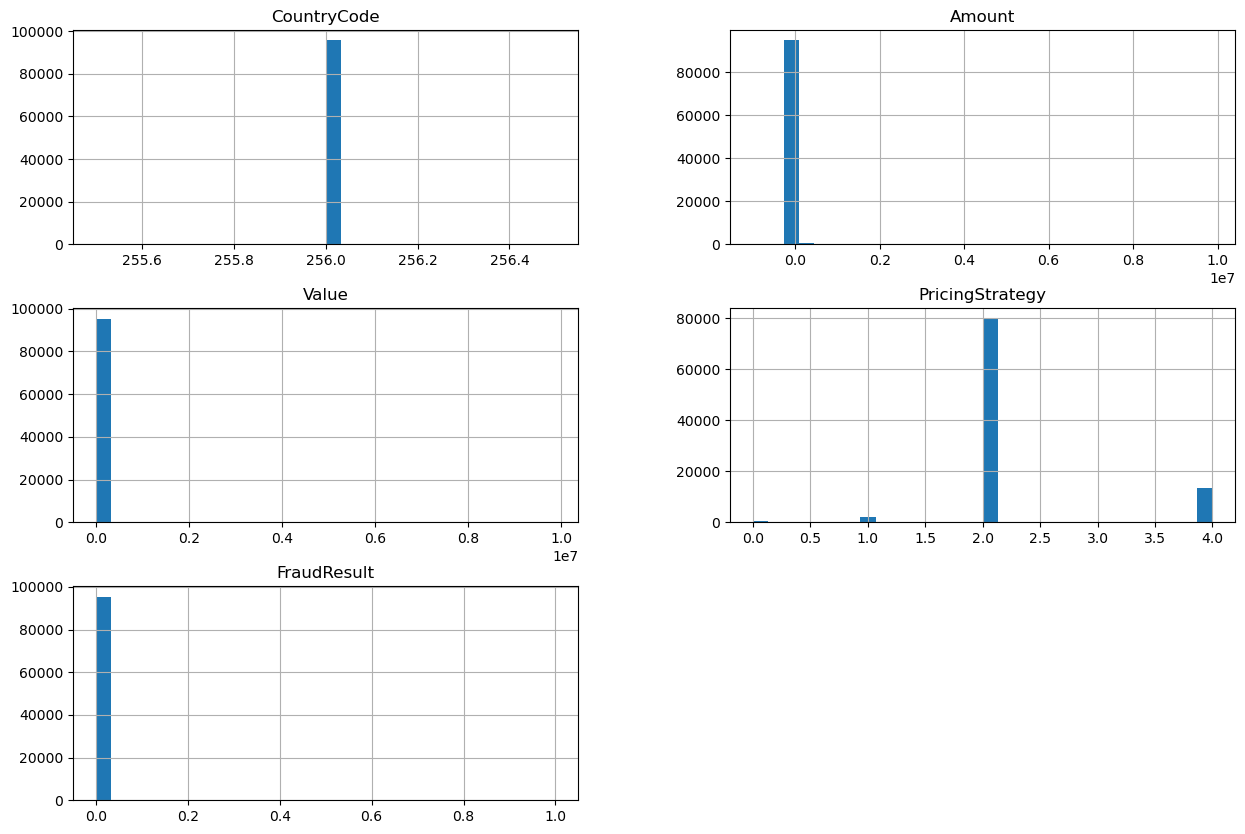

In [8]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.show()


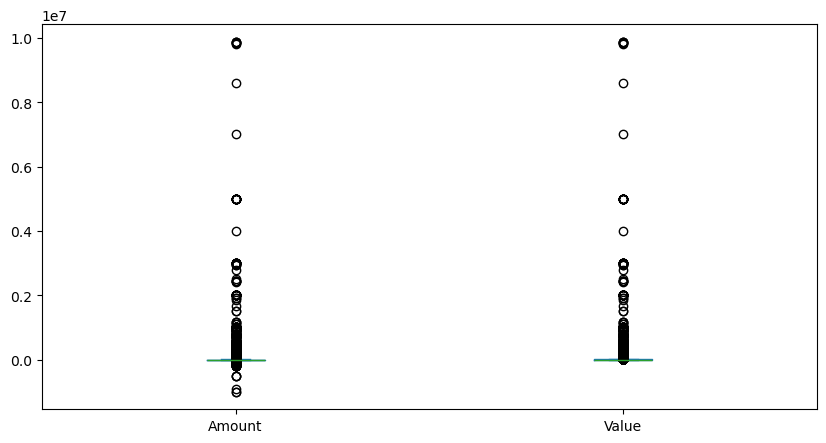

In [9]:
# Box plot for specific numerical columns ('Amount', 'Value')
df[['Amount', 'Value']].plot(kind='box', figsize=(10, 5))
plt.show()


C:\Users\King Betse\AppData\Local\Temp\ipykernel_25056\2789409290.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Amount'], shade=True)


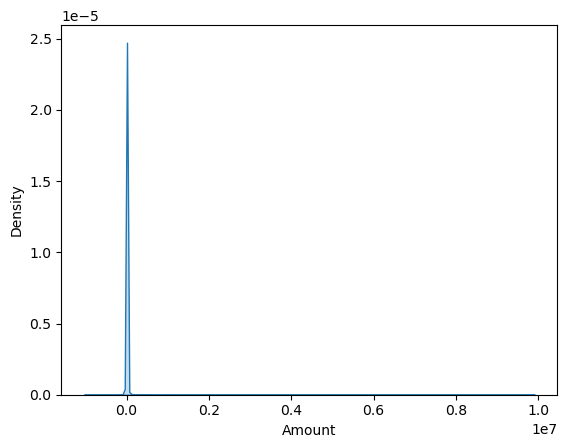

C:\Users\King Betse\AppData\Local\Temp\ipykernel_25056\2789409290.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Value'], shade=True)


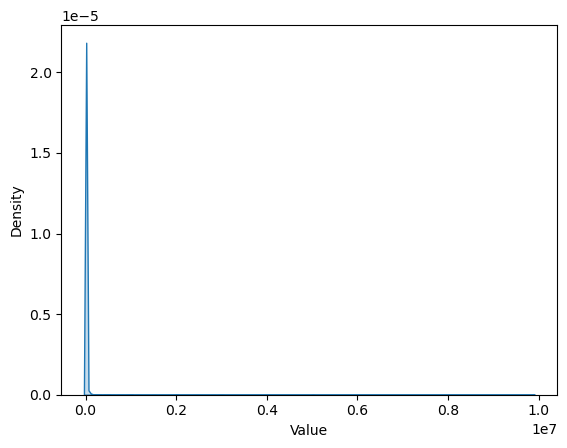

In [10]:
import seaborn as sns
# KDE plot for Amount
sns.kdeplot(df['Amount'], shade=True)
plt.show()
# KDE plot for Value
sns.kdeplot(df['Value'], shade=True)
plt.show()


## Distribution of Categoriccal Features

In [11]:
# Checking unique values for each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


TransactionId: 95662 unique values
BatchId: 94809 unique values
AccountId: 3633 unique values
SubscriptionId: 3627 unique values
CustomerId: 3742 unique values
CurrencyCode: 1 unique values
CountryCode: 1 unique values
ProviderId: 6 unique values
ProductId: 23 unique values
ProductCategory: 9 unique values
ChannelId: 4 unique values
Amount: 1676 unique values
Value: 1517 unique values
TransactionStartTime: 94556 unique values
PricingStrategy: 4 unique values
FraudResult: 2 unique values


In [12]:
# Check unique values in each column
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

    # Determine if column is likely categorical
    if unique_count < 20:  # Arbitrary threshold, can adjust based on domain knowledge
        print(f"{col} is likely categorical.\n")
    elif unique_count >= 20 and unique_count < 100:
        print(f"{col} has high cardinality. Investigate further.\n")
    else:
        print(f"{col} might be an identifier or continuous feature.\n")


TransactionId: 95662 unique values
TransactionId might be an identifier or continuous feature.

BatchId: 94809 unique values
BatchId might be an identifier or continuous feature.

AccountId: 3633 unique values
AccountId might be an identifier or continuous feature.

SubscriptionId: 3627 unique values
SubscriptionId might be an identifier or continuous feature.

CustomerId: 3742 unique values
CustomerId might be an identifier or continuous feature.

CurrencyCode: 1 unique values
CurrencyCode is likely categorical.

CountryCode: 1 unique values
CountryCode is likely categorical.

ProviderId: 6 unique values
ProviderId is likely categorical.

ProductId: 23 unique values
ProductId has high cardinality. Investigate further.

ProductCategory: 9 unique values
ProductCategory is likely categorical.

ChannelId: 4 unique values
ChannelId is likely categorical.

Amount: 1676 unique values
Amount might be an identifier or continuous feature.

Value: 1517 unique values
Value might be an identifier 

In [13]:
# From the unigue value I have identifed that the categorical data althogh the ProductId have 23 unique i will consider it as categorical data
categorical_columns = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
                       'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

# Value counts for categorical columns
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Value counts for CurrencyCode:
CurrencyCode
UGX    95662
Name: count, dtype: int64


Value counts for CountryCode:
CountryCode
256    95662
Name: count, dtype: int64


Value counts for ProviderId:
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64


Value counts for ProductId:
ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2       236
ProductId_20      216
ProductId_8       197
ProductId_24      175
ProductId_22      112
ProductId_7        86
ProductId_27       31
ProductId_5        25
ProductId_9        17
ProductId_16       10
ProductId_12        2
ProductId_23        1
Name: count, dtype: int64


Value counts for ProductCategory:
ProductCategory
financial_

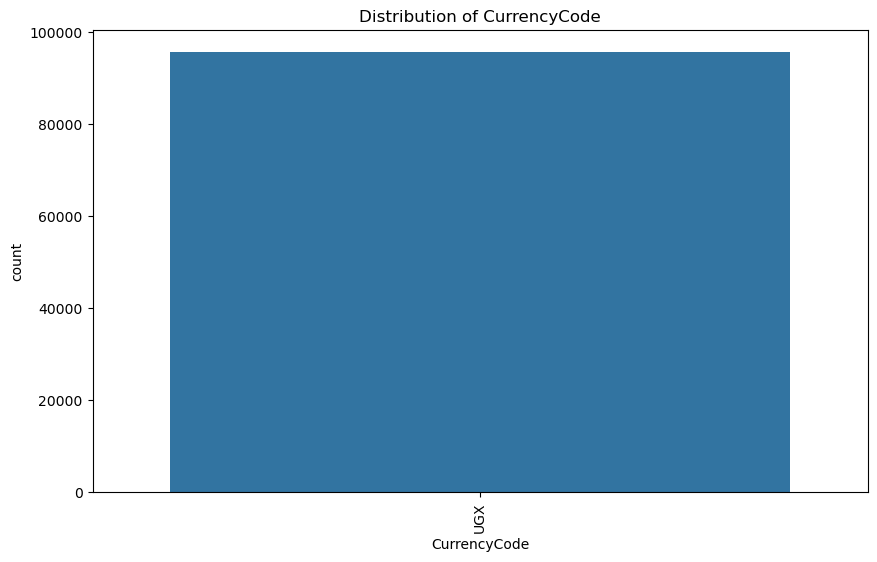

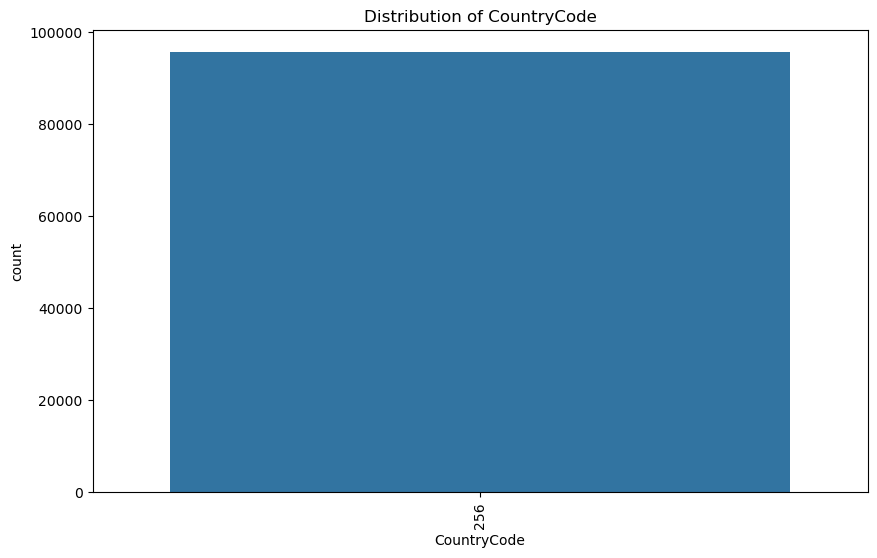

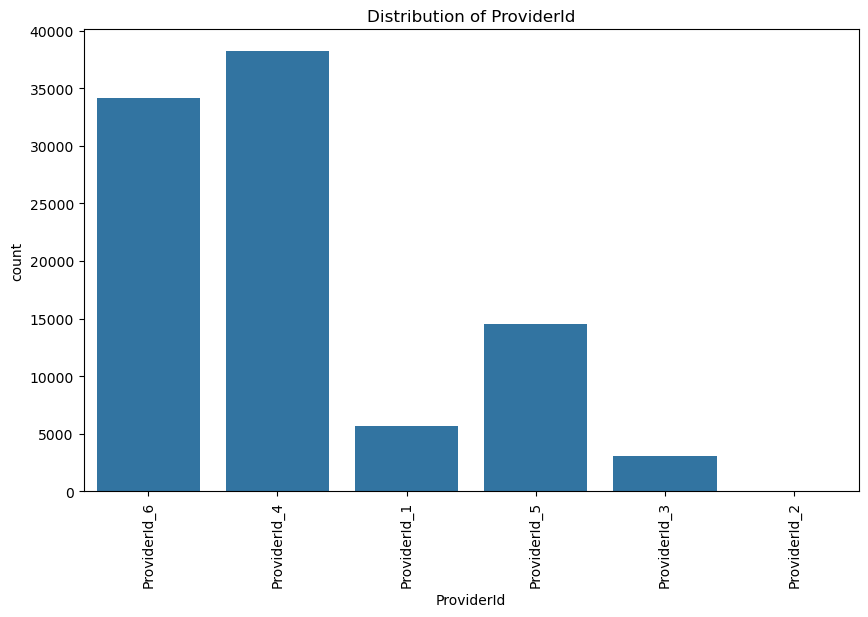

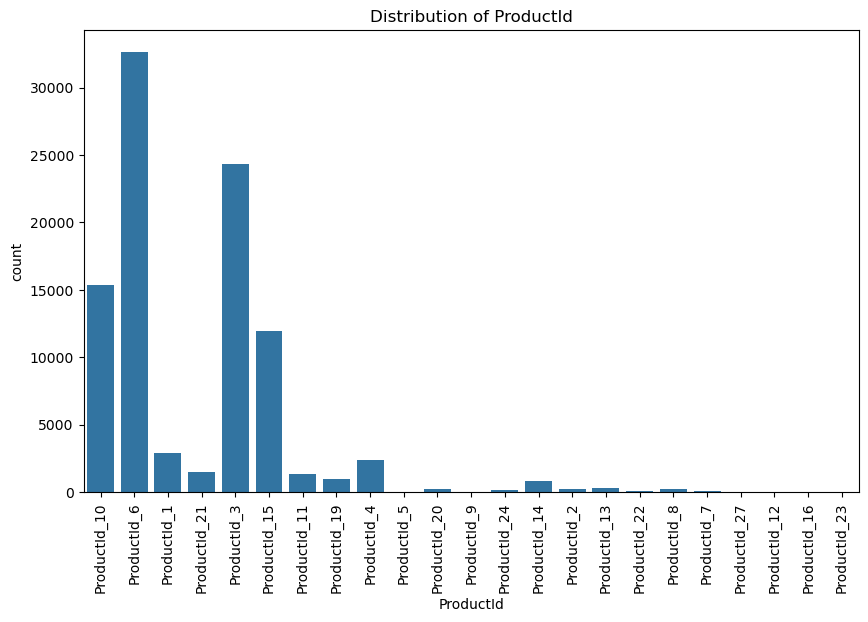

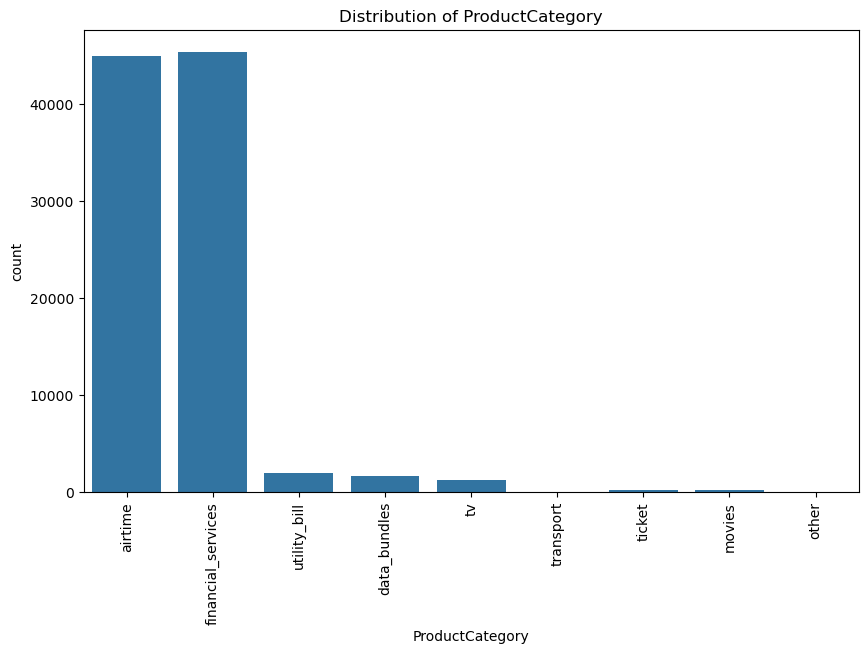

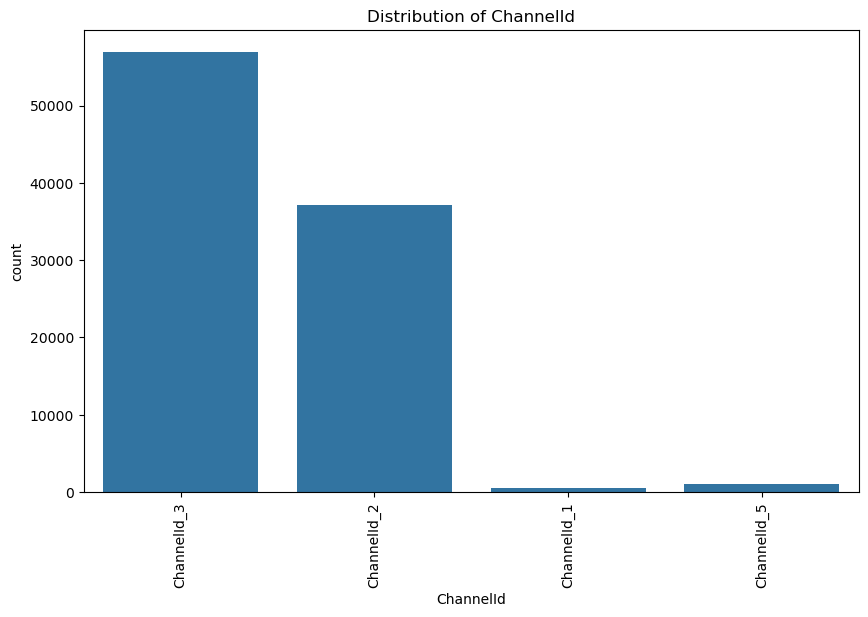

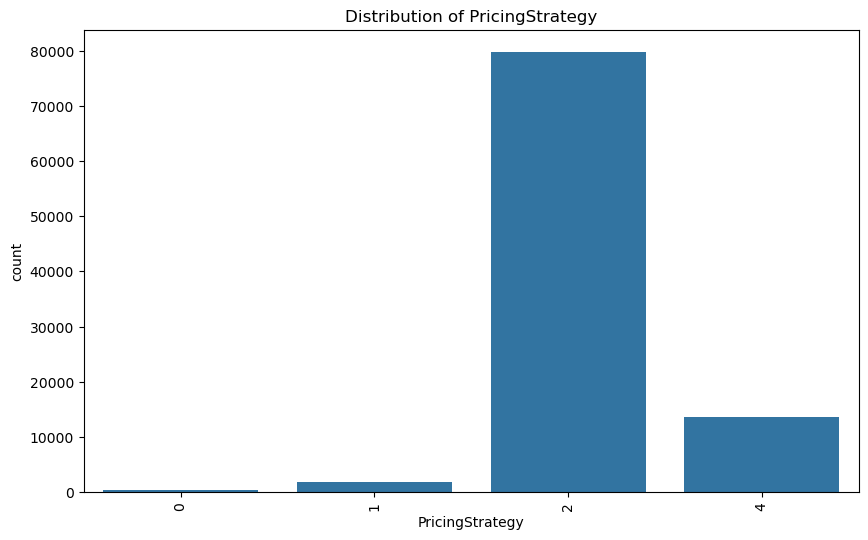

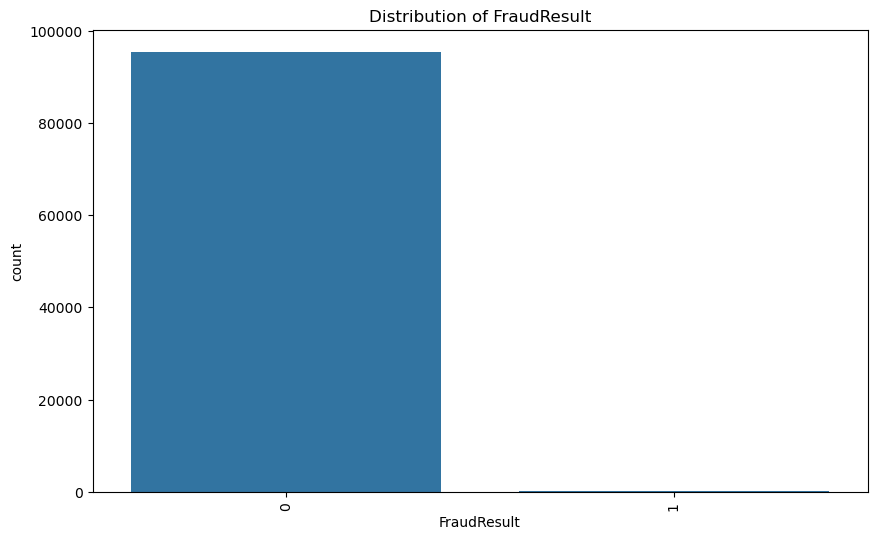

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar plots for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()


In [15]:
# Analyzing fraud distribution for each categorical variable
for col in categorical_columns:
    fraud_distribution = df.groupby(col)['FraudResult'].mean()
    print(f"Fraud Distribution by {col}:")
    print(fraud_distribution)
    print("\n")


Fraud Distribution by CurrencyCode:
CurrencyCode
UGX    0.002018
Name: FraudResult, dtype: float64


Fraud Distribution by CountryCode:
CountryCode
256    0.002018
Name: FraudResult, dtype: float64


Fraud Distribution by ProviderId:
ProviderId
ProviderId_1    0.010101
ProviderId_2    0.000000
ProviderId_3    0.020752
ProviderId_4    0.000131
ProviderId_5    0.004401
ProviderId_6    0.000088
Name: FraudResult, dtype: float64


Fraud Distribution by ProductId:
ProductId
ProductId_1     0.000000
ProductId_10    0.000390
ProductId_11    0.000000
ProductId_12    0.000000
ProductId_13    0.020270
ProductId_14    0.000000
ProductId_15    0.013123
ProductId_16    0.000000
ProductId_19    0.000000
ProductId_2     0.000000
ProductId_20    0.000000
ProductId_21    0.002646
ProductId_22    0.017857
ProductId_23    0.000000
ProductId_24    0.000000
ProductId_27    0.000000
ProductId_3     0.000493
ProductId_4     0.000000
ProductId_5     0.080000
ProductId_6     0.000031
ProductId_7     0.000000
P

## Correlation Analysis

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific numerical columns
numerical_columns = ['Amount', 'Value', 'FraudResult']  # Add more columns if needed

# Create a new dataframe with just the selected columns
df_selected = df[numerical_columns]


In [17]:
# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print(correlation_matrix)


               Amount     Value  FraudResult
Amount       1.000000  0.989692     0.557370
Value        0.989692  1.000000     0.566739
FraudResult  0.557370  0.566739     1.000000


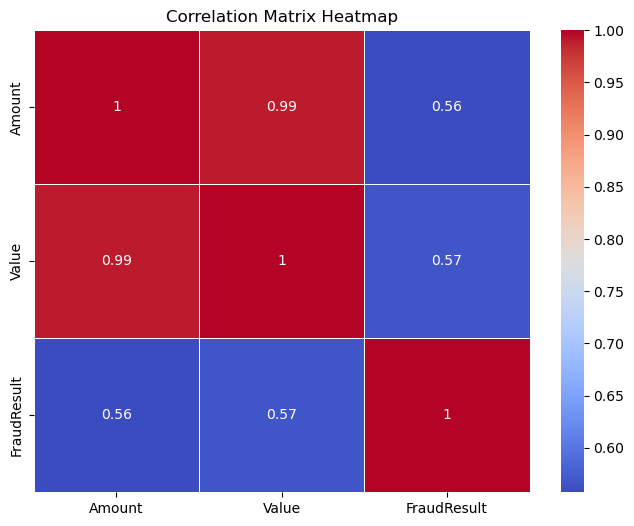

In [18]:
# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Identifying Missing Values

In [19]:
# Check for missing values in categorical columns
df[categorical_columns].isnull().sum()


CurrencyCode       0
CountryCode        0
ProviderId         0
ProductId          0
ProductCategory    0
ChannelId          0
PricingStrategy    0
FraudResult        0
dtype: int64

## Outlier Detection

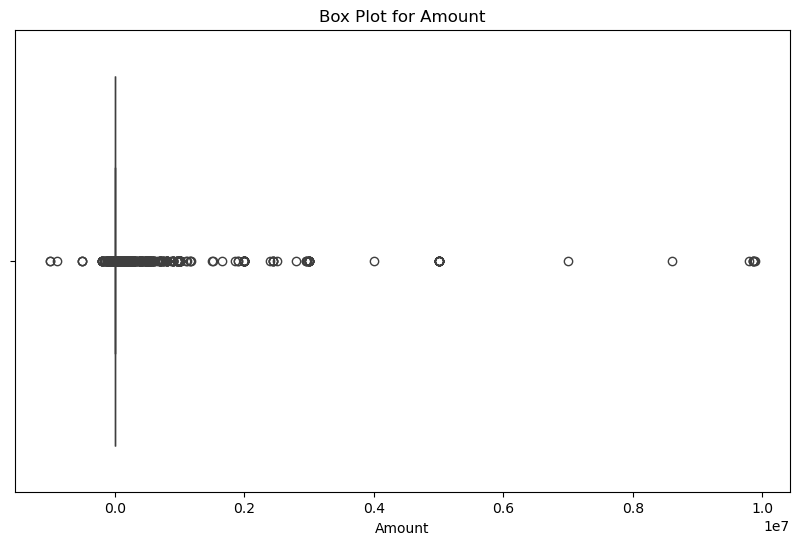

In [20]:
# Box plot for 'Amount' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Box Plot for Amount')
plt.show()


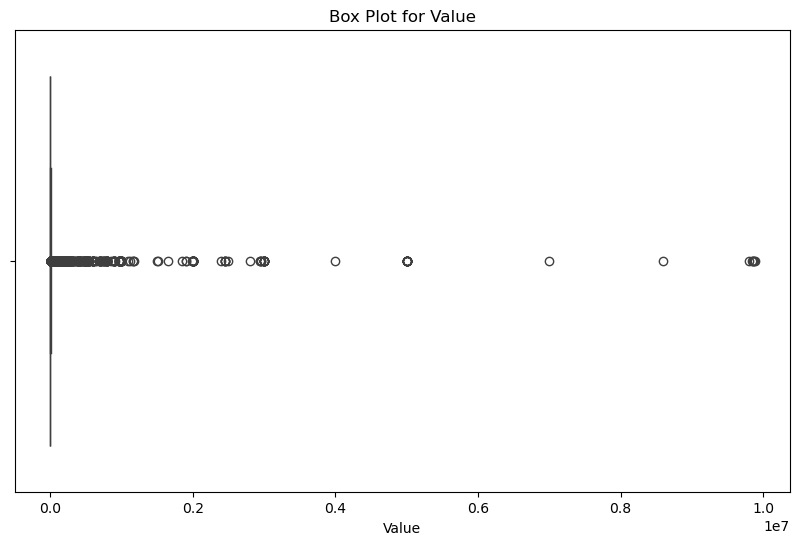

In [21]:
# Box plot for 'Value' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Value'])
plt.title('Box Plot for Value')
plt.show()


In [22]:
# Creating Aggregate Features
aggregate_features = df.groupby('CustomerId').agg(
    total_transaction_amount=('Amount', 'sum'),
    avg_transaction_amount=('Amount', 'mean'),
    transaction_count=('TransactionId', 'count'),
    std_transaction_amount=('Amount', 'std')
).reset_index()

# Merge these aggregate features back to the original DataFrame
df = pd.merge(df, aggregate_features, on='CustomerId', how='left')

# Display the first few rows of the merged DataFrame
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,total_transaction_amount,avg_transaction_amount,transaction_count,std_transaction_amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


In [23]:
# Convert 'TransactionStartTime' to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract hour, day, month, and year
df['transaction_hour'] = df['TransactionStartTime'].dt.hour
df['transaction_day'] = df['TransactionStartTime'].dt.day
df['transaction_month'] = df['TransactionStartTime'].dt.month
df['transaction_year'] = df['TransactionStartTime'].dt.year

In [24]:
# Using pandas' get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=['ProductCategory', 'CurrencyCode'], drop_first=True)
from sklearn.preprocessing import LabelEncoder

# Label encoding for a single column
label_encoder = LabelEncoder()
df['ProviderId_encoded'] = label_encoder.fit_transform(df['ProviderId'])

In [25]:
# Fill missing values with the mean for numerical columns
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())
df['Value'] = df['Value'].fillna(df['Value'].mean())
df['total_transaction_amount'] = df['total_transaction_amount'].fillna(df['total_transaction_amount'].mean())
df['avg_transaction_amount'] = df['avg_transaction_amount'].fillna(df['avg_transaction_amount'].mean())
df['std_transaction_amount'] = df['std_transaction_amount'].fillna(df['std_transaction_amount'].mean())

In [26]:
# Example of encoding check
print(df['ProviderId_encoded'].head())

0    5
1    3
2    5
3    0
4    3
Name: ProviderId_encoded, dtype: int32


In [27]:
# Correlation matrix for numerical columns
correlation_matrix = df[['Amount', 'Value', 'total_transaction_amount',
                         'avg_transaction_amount', 'transaction_count',
                         'std_transaction_amount', 'FraudResult']].corr()

# Display the correlation matrix
print(correlation_matrix)

                            Amount     Value  total_transaction_amount  \
Amount                    1.000000  0.989692                  0.116830   
Value                     0.989692  1.000000                  0.035650   
total_transaction_amount  0.116830  0.035650                  1.000000   
avg_transaction_amount    0.694881  0.684791                  0.168129   
transaction_count        -0.057588  0.014352                 -0.861501   
std_transaction_amount    0.476140  0.479541                  0.156128   
FraudResult               0.557370  0.566739                  0.063469   

                          avg_transaction_amount  transaction_count  \
Amount                                  0.694881          -0.057588   
Value                                   0.684791           0.014352   
total_transaction_amount                0.168129          -0.861501   
avg_transaction_amount                  1.000000          -0.082875   
transaction_count                      -0.082875    

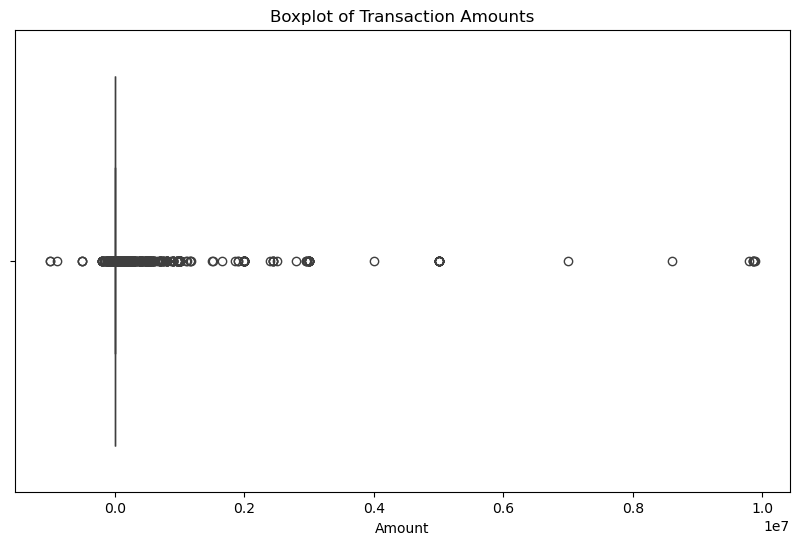

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to detect outliers in 'Amount'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Amount_normalized'] = scaler.fit_transform(df[['Amount']])

In [30]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df['Amount_standardized'] = standard_scaler.fit_transform(df[['Amount']])

In [31]:
import pandas as pd
import numpy as np

# 'TransactionStartTime' is in datetime format
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Recency: Days since the last transaction
df['recency'] = (df['TransactionStartTime'].max() - df['TransactionStartTime']).dt.days

# Frequency: Number of transactions per user
df['frequency'] = df.groupby('CustomerId')['TransactionId'].transform('count')

# Monetary: Total transaction amount per user
df['monetary'] = df.groupby('CustomerId')['Amount'].transform('sum')

# Seasonality: We can extract the month of the year or any seasonal pattern
df['transaction_month'] = df['TransactionStartTime'].dt.month
seasonality = df.groupby('CustomerId')['transaction_month'].agg(lambda x: x.value_counts().idxmax())
df['seasonality'] = df['CustomerId'].map(seasonality)


In [32]:
# Define thresholds for good/bad classification based on RFMS values
# These thresholds are arbitrary and can be adjusted based on your specific data

recency_threshold = 30  # Users with recency more than 30 days might be classified as "bad"
frequency_threshold = 5  # Users with less than 5 transactions might be classified as "bad"
monetary_threshold = 500  # Users who spent less than $500 might be classified as "bad"

# Classifying users into 'good' or 'bad'
df['credit_risk'] = 'good'  # Default label

df.loc[(df['recency'] > recency_threshold) |
       (df['frequency'] < frequency_threshold) |
       (df['monetary'] < monetary_threshold), 'credit_risk'] = 'bad'

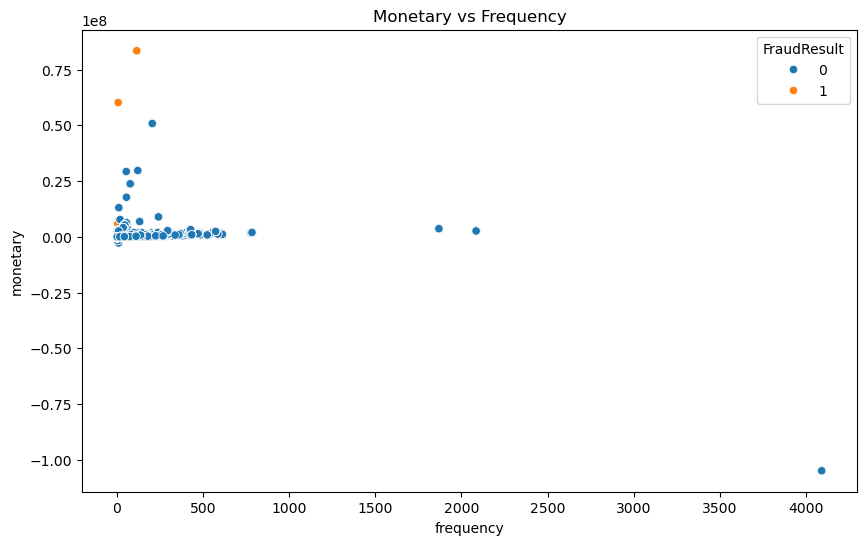

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Monetary vs. Frequency to establish boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='frequency', y='monetary', hue='FraudResult', data=df)
plt.title('Monetary vs Frequency')
plt.show()

# Defining thresholds based on visual inspection or domain knowledge
df['credit_risk'] = np.where((df['frequency'] >= 5) & (df['monetary'] >= 500), 'good', 'bad')

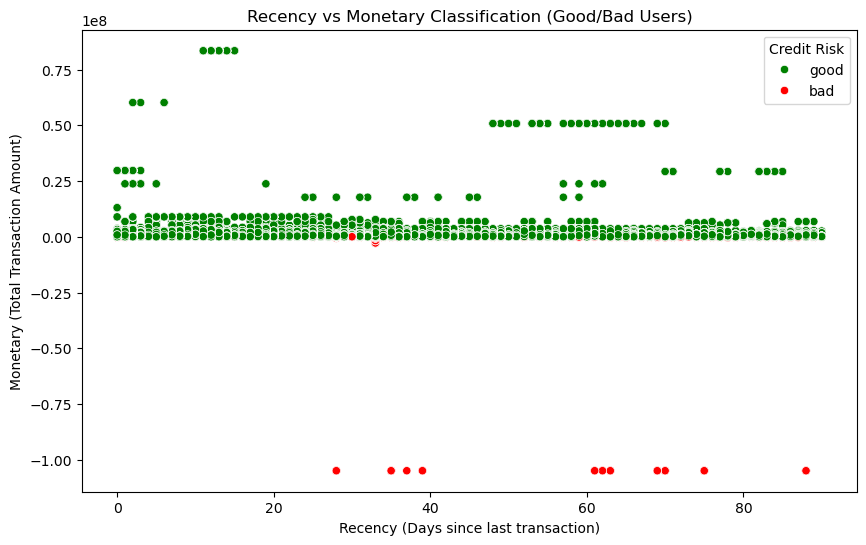

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot for Recency vs Monetary colored by credit_risk
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='monetary', hue='credit_risk', data=df, palette={'good': 'green', 'bad': 'red'})
plt.title('Recency vs Monetary Classification (Good/Bad Users)')
plt.xlabel('Recency (Days since last transaction)')
plt.ylabel('Monetary (Total Transaction Amount)')
plt.legend(title='Credit Risk')
plt.show()

C:\Users\King Betse\AppData\Local\Temp\ipykernel_25056\737333471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='credit_risk', data=df, palette={'good': 'green', 'bad': 'red'})


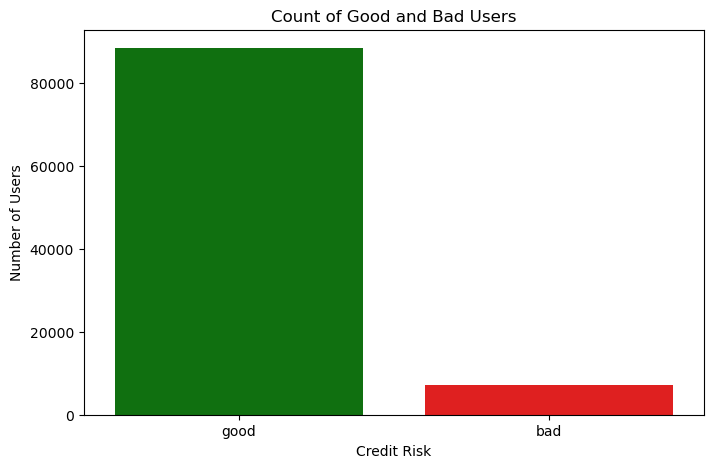

In [35]:
# Count of good and bad users
plt.figure(figsize=(8, 5))
sns.countplot(x='credit_risk', data=df, palette={'good': 'green', 'bad': 'red'})
plt.title('Count of Good and Bad Users')
plt.xlabel('Credit Risk')
plt.ylabel('Number of Users')
plt.show()

C:\Users\King Betse\AppData\Local\Temp\ipykernel_25056\3116804300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y='recency', data=df, palette={'good': 'green', 'bad': 'red'})


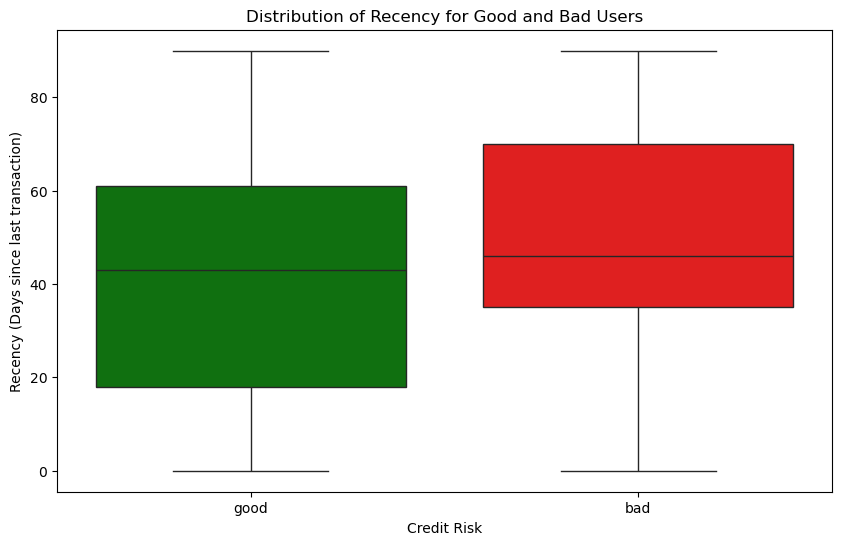

C:\Users\King Betse\AppData\Local\Temp\ipykernel_25056\3116804300.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y='monetary', data=df, palette={'good': 'green', 'bad': 'red'})


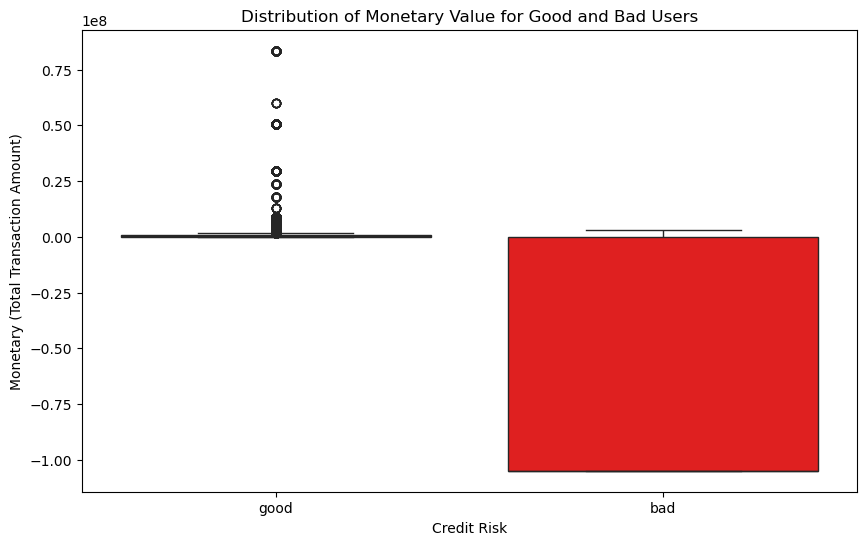

In [36]:
 # Boxplot for Recency grouped by good/bad classification
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_risk', y='recency', data=df, palette={'good': 'green', 'bad': 'red'})
plt.title('Distribution of Recency for Good and Bad Users')
plt.xlabel('Credit Risk')
plt.ylabel('Recency (Days since last transaction)')
plt.show()

# Boxplot for Monetary grouped by good/bad classification
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_risk', y='monetary', data=df, palette={'good': 'green', 'bad': 'red'})
plt.title('Distribution of Monetary Value for Good and Bad Users')
plt.xlabel('Credit Risk')
plt.ylabel('Monetary (Total Transaction Amount)')
plt.show()


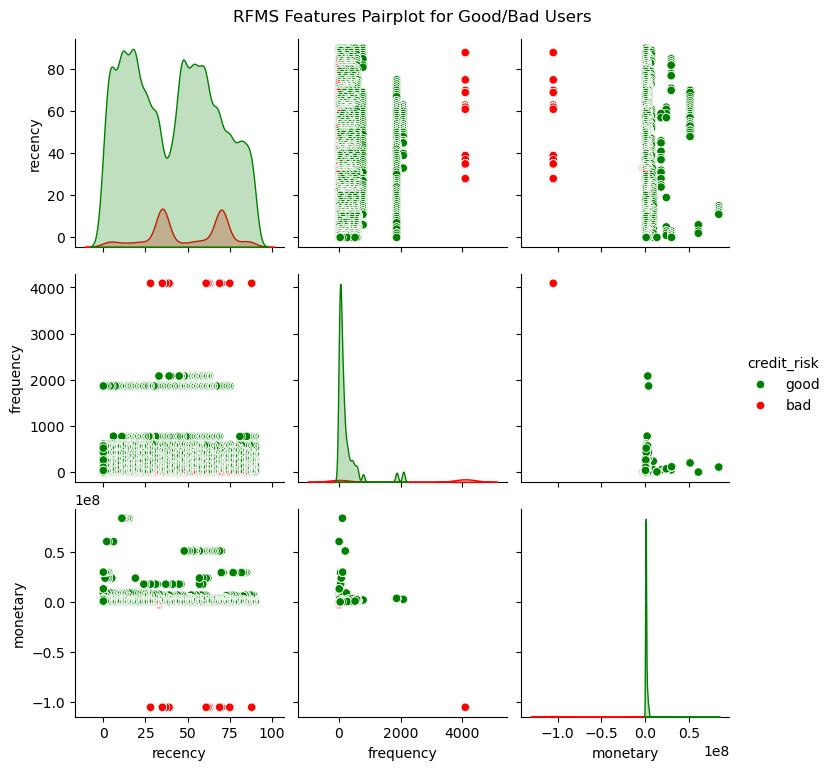

In [37]:
# Pairplot for RFMS features colored by good/bad classification
sns.pairplot(df[['recency', 'frequency', 'monetary', 'credit_risk']], hue='credit_risk', palette={'good': 'green', 'bad': 'red'})
plt.suptitle('RFMS Features Pairplot for Good/Bad Users', y=1.02)
plt.show()

In [38]:
print(df.columns)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CountryCode', 'ProviderId', 'ProductId', 'ChannelId', 'Amount',
       'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'total_transaction_amount', 'avg_transaction_amount',
       'transaction_count', 'std_transaction_amount', 'transaction_hour',
       'transaction_day', 'transaction_month', 'transaction_year',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services',
       'ProductCategory_movies', 'ProductCategory_other',
       'ProductCategory_ticket', 'ProductCategory_transport',
       'ProductCategory_tv', 'ProductCategory_utility_bill',
       'ProviderId_encoded', 'Amount_normalized', 'Amount_standardized',
       'recency', 'frequency', 'monetary', 'seasonality', 'credit_risk'],
      dtype='object')


In [39]:
# Create 'Amount_bin' column by binning the 'Amount' values into categories (example)
df['Amount_bin'] = pd.cut(df['Amount'], bins=[0, 100, 500, 1000, 5000], labels=['Low', 'Medium', 'High', 'Very High'])


In [40]:
import pandas as pd
import numpy as np

# Define a function to calculate WoE and IV for a single variable with smoothing
def calc_woe_iv(df, feature, target, epsilon=1e-6):
    good_total = len(df[df[target] == 0])
    bad_total = len(df[df[target] == 1])

    feature_summary = df.groupby(feature).agg({
        target: ['count', 'sum']
    })

    feature_summary.columns = ['Total', 'Bad']
    feature_summary['Good'] = feature_summary['Total'] - feature_summary['Bad']

    feature_summary['Good Dist'] = feature_summary['Good'] / good_total
    feature_summary['Bad Dist'] = feature_summary['Bad'] / bad_total

    # Add epsilon to avoid division by zero
    feature_summary['WoE'] = np.log((feature_summary['Good Dist'] + epsilon) / (feature_summary['Bad Dist'] + epsilon))

    # Calculate IV
    feature_summary['IV'] = (feature_summary['Good Dist'] - feature_summary['Bad Dist']) * feature_summary['WoE']

    # Replace inf values with a large number
    feature_summary['WoE'] = feature_summary['WoE'].replace([np.inf, -np.inf], [10, -10])

    iv_total = feature_summary['IV'].sum()

    return feature_summary[['Total', 'Good', 'Bad', 'Good Dist', 'Bad Dist', 'WoE', 'IV']], iv_total

# Woe table show
woe_table, iv_total = calc_woe_iv(df, 'Amount_bin', 'FraudResult')
print(woe_table)
print(f'Information Value (IV) for Amount: {iv_total}')

            Total   Good  Bad  Good Dist  Bad Dist        WoE        IV
Amount_bin                                                             
Low            52     52    0   0.000545  0.000000   6.302032  0.003433
Medium       5342   5341    1   0.055945  0.005181   2.379126  0.120773
High        18542  18542    0   0.194220  0.000000  12.176753  2.364970
Very High   17316  17316    0   0.181378  0.000000  12.108345  2.196190
Information Value (IV) for Amount: 4.685366146932225


C:\Users\King Betse\AppData\Local\Temp\ipykernel_25056\2649236490.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature_summary = df.groupby(feature).agg({


In [41]:
# Apply WoE and IV calculation
woe_table, iv_total = calc_woe_iv(df, 'ProviderId', 'FraudResult')

# Display the WoE table
print(woe_table)
print(f'Information Value (IV) for ProviderId: {iv_total}')

              Total   Good  Bad  Good Dist  Bad Dist       WoE        IV
ProviderId                                                              
ProviderId_1   5643   5586   57   0.058511  0.295337 -1.618885  0.383394
ProviderId_2     18     18    0   0.000189  0.000000  5.244615  0.000989
ProviderId_3   3084   3020   64   0.031633  0.331606 -2.349709  0.704849
ProviderId_4  38189  38184    5   0.399962  0.025907  2.736831  1.023727
ProviderId_5  14542  14478   64   0.151651  0.331606 -0.782361  0.140790
ProviderId_6  34186  34183    3   0.358053  0.015544  3.136943  1.074432
Information Value (IV) for ProviderId: 3.3281804508581256


In [42]:
# Bin the numerical feature (e.g., 'Amount')
df['Amount_bin'] = pd.cut(df['Amount'], bins=5)

# Apply WoE and IV calculation on the binned numerical feature
woe_table, iv_total = calc_woe_iv(df, 'Amount_bin', 'FraudResult')

# Display the WoE table
print(woe_table)
print(f'Information Value (IV) for Amount: {iv_total}')

                         Total   Good  Bad  Good Dist  Bad Dist        WoE  \
Amount_bin                                                                   
(-1010880.0, 1176000.0]  95586  95448  138    0.99978  0.715026   0.335216   
(1176000.0, 3352000.0]      54     21   33    0.00022  0.170984  -6.651322   
(3352000.0, 5528000.0]      14      0   14    0.00000  0.072539 -11.191891   
(5528000.0, 7704000.0]       1      0    1    0.00000  0.005181  -8.553013   
(7704000.0, 9880000.0]       7      0    7    0.00000  0.036269 -10.498758   

                               IV  
Amount_bin                         
(-1010880.0, 1176000.0]  0.095454  
(1176000.0, 3352000.0]   1.135810  
(3352000.0, 5528000.0]   0.811847  
(5528000.0, 7704000.0]   0.044316  
(7704000.0, 9880000.0]   0.380784  
Information Value (IV) for Amount: 2.4682108978114417


C:\Users\King Betse\AppData\Local\Temp\ipykernel_25056\2649236490.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature_summary = df.groupby(feature).agg({


In [43]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['FraudResult'])  # Drop the target column
y = df['FraudResult']  # This is the target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,ProductCategory_utility_bill,ProviderId_encoded,Amount_normalized,Amount_standardized,recency,frequency,monetary,seasonality,credit_risk,Amount_bin
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,ProviderId_6,ProductId_10,ChannelId_3,1000.0,...,False,5,0.092004,-0.046371,90,119,109921.75,11,good,"(-1010880.0, 1176000.0]"
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,ProviderId_4,ProductId_6,ChannelId_2,-20.0,...,False,3,0.091910,-0.054643,90,119,109921.75,11,good,"(-1010880.0, 1176000.0]"
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,ProviderId_6,ProductId_1,ChannelId_3,500.0,...,False,5,0.091958,-0.050426,90,2,1000.00,11,bad,"(-1010880.0, 1176000.0]"
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,ProviderId_1,ProductId_21,ChannelId_3,20000.0,...,True,0,0.093750,0.107717,90,38,228727.20,12,good,"(-1010880.0, 1176000.0]"
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,ProviderId_4,ProductId_6,ChannelId_2,-644.0,...,False,3,0.091853,-0.059704,90,38,228727.20,12,good,"(-1010880.0, 1176000.0]"


In [45]:
print(X_train.dtypes)


TransactionId                                      object
BatchId                                            object
AccountId                                          object
SubscriptionId                                     object
CustomerId                                         object
CountryCode                                         int64
ProviderId                                         object
ProductId                                          object
ChannelId                                          object
Amount                                            float64
Value                                               int64
TransactionStartTime                  datetime64[ns, UTC]
PricingStrategy                                     int64
total_transaction_amount                          float64
avg_transaction_amount                            float64
transaction_count                                   int64
std_transaction_amount                            float64
transaction_ho

In [49]:
# Drop unnecessary columns that don't add value to model training
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Assuming X_train and X_test are defined

columns_to_drop = [
    'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
    'ProviderId', 'ProductId', 'ChannelId', 'TransactionStartTime'
]

# Drop these columns from the training and test sets
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Convert categorical columns to numeric values (One-Hot Encoding for 'Amount_bin' and 'credit_risk')
categorical_columns = ['Amount_bin', 'credit_risk']
existing_categorical_columns = [col for col in categorical_columns if col in X_train.columns]

if existing_categorical_columns:
    X_train = pd.get_dummies(X_train, columns=existing_categorical_columns, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=existing_categorical_columns, drop_first=True)

# Convert boolean columns to integers
boolean_columns = [col for col in X_train.columns if X_train[col].dtype == 'bool']
for col in boolean_columns:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

# Ensure columns are aligned between training and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Convert all columns to numeric to avoid errors during model fitting
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill any remaining NaN values with 0 (or use other imputation strategies)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Proceed with model training as before
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print the results for each model
    print(f"{model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print('-' * 50)

KeyError: "None of [Index(['Amount_bin', 'credit_risk'], dtype='object')] are in the [columns]"

In [80]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning (example for Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid,
                              scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

# Perform grid search
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best ROC-AUC score for Random Forest: {grid_search_rf.best_score_:.4f}")


KeyboardInterrupt: 

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gbm = GradientBoostingClassifier(random_state=42)

# Create a dictionary of models
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Gradient Boosting': gbm
}

# Train each model and evaluate on the test set
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print the results for each model
    print(f"{model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print('-' * 50)


ValueError: could not convert string to float: 'TransactionId_140210'